In [1]:
from BFCalc.BFInterp import DM_spectrum_setup
from BFCalc.createspectragrids import singlechannel_diffflux, getspectrafunc
from utils import log10eaxis, logjacob, makedist, makelogjacob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import special
from matplotlib import cm
from tqdm.autonotebook import tqdm as notebook_tqdm
import os, sys
sys.path.append("BFCalc")


/Users/lpin0002/anaconda3/envs/please/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logjacob = makelogjacob(log10eaxis)

In [3]:
logmassaxis = np.linspace(-1,2,16)
colormap = cm.get_cmap('cool')

gridtointerpolate   = np.load(f"BFCalc/griddata/channel=b_massenergy_diffflux_grid.npy")
massvalues          = np.array(np.load(f"BFCalc/griddata/massvals_massenergy_diffflux_grid.npy"))
log10xvals        = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")

log10massvals = np.log10(massvalues)-3
gridtointerpolate

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/3464075514.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('cool')


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [4.10517119e+00, 3.97644319e+00, 3.84543215e+00, ...,
        1.31400894e-07, 8.88485578e-08, 6.16119105e-08],
       [3.49801982e+00, 3.41892126e+00, 3.38142276e+00, ...,
        8.67136554e-08, 5.87862341e-08, 4.01201242e-08],
       [3.39107839e+00, 3.42814497e+00, 3.56227681e+00, ...,
        4.77854570e-08, 3.23265813e-08, 2.14454615e-08]])

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/3836008613.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


0.0
1.3322676295501878e-15
-8.881784197001252e-16
-8.881784197001252e-16
4.440892098500626e-16
4.440892098500626e-16
-8.881784197001252e-16
4.440892098500626e-16
0.0
4.440892098500626e-16
4.440892098500626e-16
4.440892098500626e-16
0.0
4.440892098500626e-16
0.0
0.0


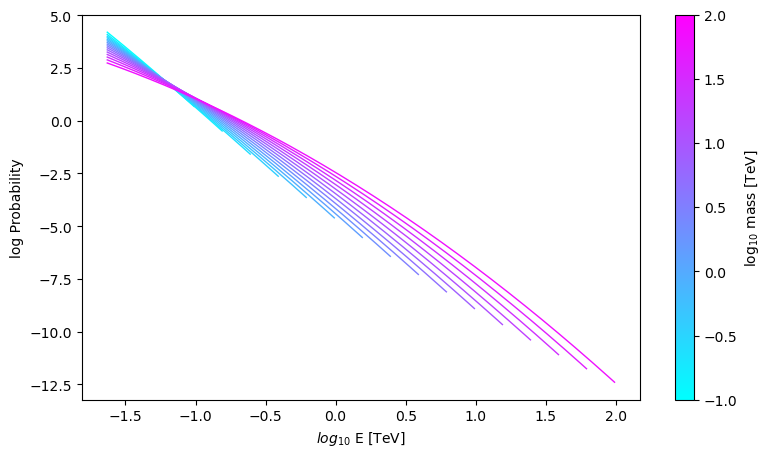

In [4]:
plt.figure(figsize=(9,5))
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = special.logsumexp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)
    print(dN_dE_norm)
    plt.plot(log10eaxis, makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis), color=color, lw=1.0)
    # plt.axvline(logmass, color=color, lw=0.3)
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'log Probability')
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
# plt.ylim(-20,0)


plt.show()

In [5]:
special.logsumexp(DM_spectrum_setup(2.0, normeaxis=10**log10eaxis)(log10eaxis)+makelogjacob(log10eaxis))

/Users/lpin0002/Desktop/DMPipe/BFCalc/BFInterp.py:33: RuntimeWarning: divide by zero encountered in log
  logdN_dE_fullaxis = np.squeeze(np.log(spectralfunc(eaxis)))


0.0

In [6]:
special.logsumexp( np.array([makedist(2.0, normeaxis=10**log10eaxis)(logeval) for logeval in log10eaxis])+logjacob)


0.0

In [7]:
spectravals = []
for logmass in notebook_tqdm(logmassaxis):
    tempfunc = DM_spectrum_setup(logmass, normeaxis=10**log10eaxis)
    
    singlerowspecvals = tempfunc(log10eaxis)
    print(special.logsumexp(singlerowspecvals+logjacob))
    spectravals.append(singlerowspecvals)
spectravals = np.array(spectravals)

100%|██████████| 16/16 [00:00<00:00, 663.52it/s]

4.440892098500626e-16
-8.881784197001252e-16
-4.440892098500626e-16
0.0
4.440892098500626e-16
4.440892098500626e-16
-4.440892098500626e-16
0.0
-4.440892098500626e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [8]:
print(special.logsumexp(spectravals[0]+logjacob))

4.440892098500626e-16


In [9]:
spectravals[3,:]

array([ 4.30968657,  4.20083203,  4.09171824,  3.98377658,  3.86275774,
        3.7558019 ,  3.63602111,  3.51599564,  3.39769196,  3.26349076,
        3.14544275,  3.01157057,  2.87756608,  2.74630869,  2.59518198,
        2.46646203,  2.31869088,  2.17082664,  2.02685641,  1.85861573,
        1.71877665,  1.55615332,  1.39350414,  1.23630769,  1.04970629,
        0.8967149 ,  0.7160142 ,  0.53541453,  0.36271203,  0.15382567,
       -0.01132871, -0.20926158, -0.40710272, -0.59436424, -0.82496396,
       -1.00201733, -1.21731009, -1.43265511, -1.63431957, -1.88719751,
       -2.07912427, -2.31685073, -2.55454391, -2.77303726, -3.05301677,
       -3.25146942, -3.49930838, -3.74430732, -3.9623446 , -4.24157375,
       -4.42882504, -4.65940897, -4.87924586, -5.06394762, -5.290672  ,
       -5.44229749, -5.62109452, -5.7919318 , -5.94315478, -6.12139185,
       -6.22672218, -6.3444675 ,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,      

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/3206500609.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


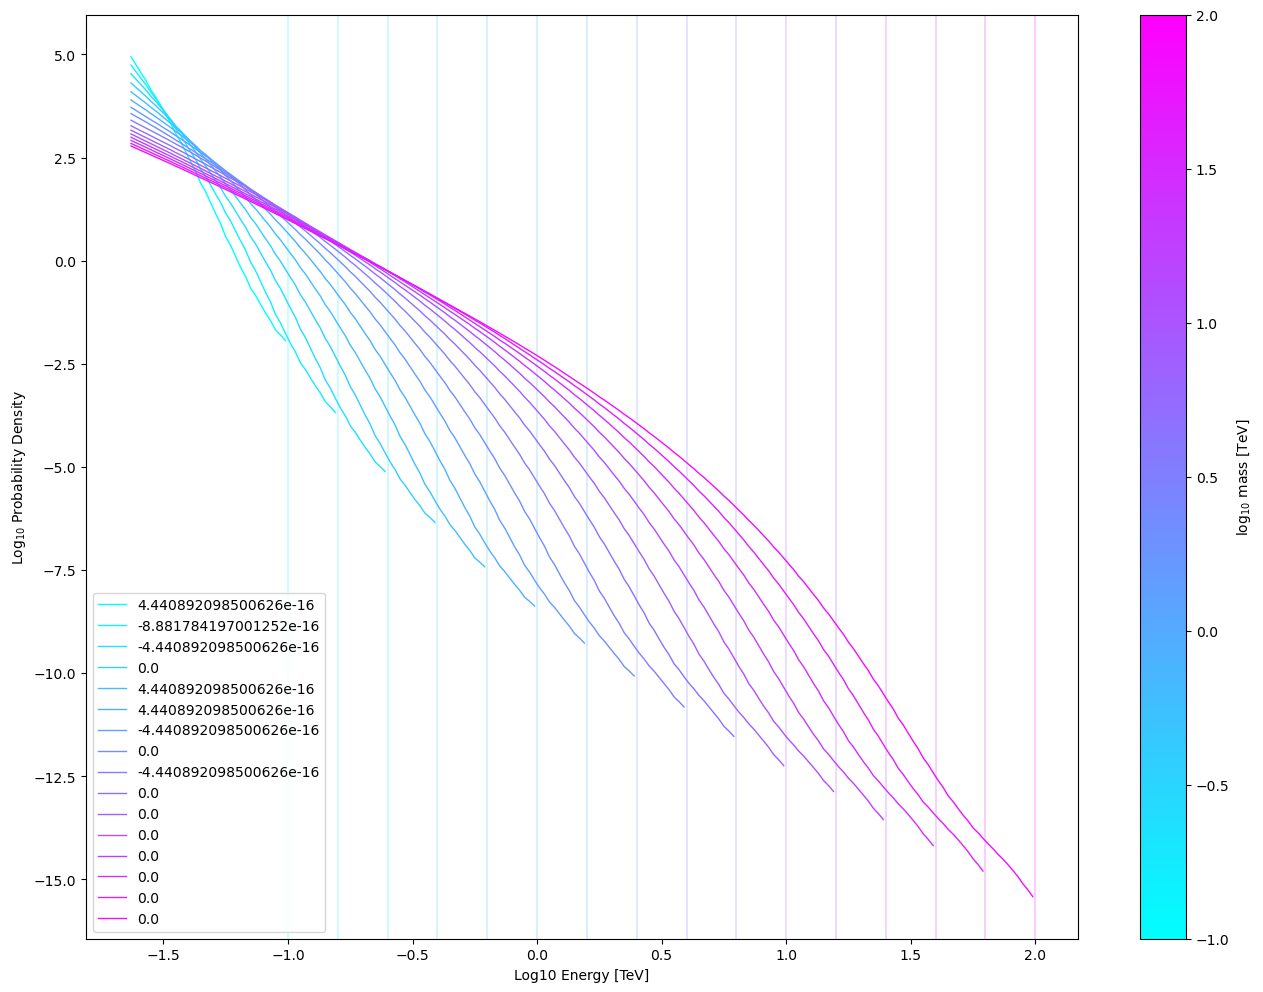

In [10]:
plt.figure(dpi=100,figsize=(16,12))
# plt.pcolormesh(log10eaxis, logmassaxis, spectravals, label=logmass, lw=0.8)
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    
    
    single_spectravals = np.array(spectravals)[idx,:]
    plt.plot(log10eaxis, single_spectravals, color=color, lw=1.0, label=special.logsumexp(single_spectravals+logjacob))
    plt.axvline(logmass, c=color, lw=0.3, linestyle='-')

# for logmassval in log10massvals:
#     plt.axvline(logmassval, c='tab:orange', lw=0.5, linestyle="--")
plt.xlabel('Log10 Energy [TeV]')

plt.ylabel(r'Log$_{10} $ Probability Density')
# plt.yscale('log')
# plt.xlim([-0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[0], 0.1*(logmassaxis[-1]-logmassaxis[0])+logmassaxis[-1]])
# plt.ylim([-8,0])

plt.legend()
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/4242967489.py:15: RuntimeWarning: divide by zero encountered in log
  np.log(gridtointerpolate).T, label='log')
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/4242967489.py:21: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


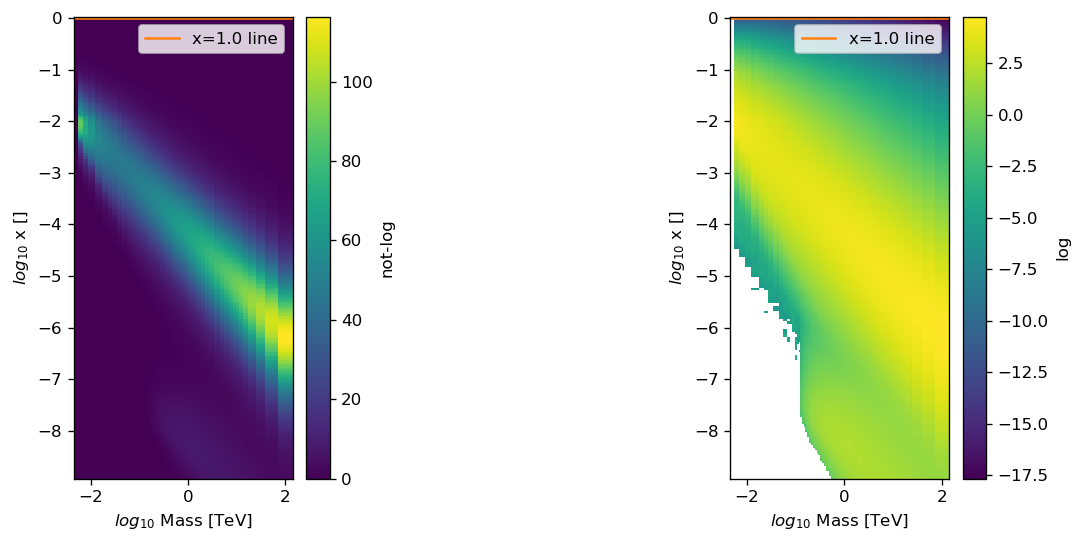

In [27]:
plt.figure(dpi=120,figsize=(10,5))
plt.subplot(1,2,1)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               (gridtointerpolate).T)
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")
plt.colorbar(label='not-log')
plt.legend()

plt.subplot(1,2,2)
plt.pcolormesh(log10massvals, 
               log10xvals, 
               np.log(gridtointerpolate).T, label='log')
plt.axhline(0.0, label="x=1.0 line", c="tab:orange")
plt.xlabel(r"$log_{10}$ Mass [TeV]")
plt.ylabel(r"$log_{10}$ x []")
plt.colorbar(label='log')

plt.legend()


In [12]:
log10massvals.shape

(62,)

In [13]:
gridtointerpolate[log10massvals<-1.,]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.79549021e-05, 2.09533162e-05, 1.04230676e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.83211295e-05, 2.84453450e-05, 1.41145707e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.17994787e-05, 1.30801598e-05, 9.14500095e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.97511400e-05, 1.19141530e-05, 8.37645482e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.85103340e-05, 1.15053739e-05, 8.27572263e-06]])

In [14]:
np.arange(0,5)

array([0, 1, 2, 3, 4])

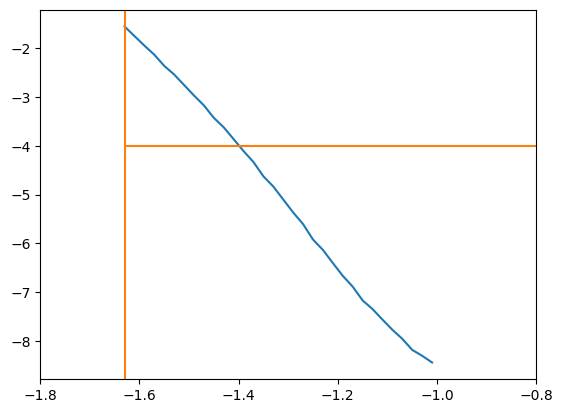

In [15]:
plt.figure()
plt.plot(log10eaxis, DM_spectrum_setup(-1.0)(log10eaxis))
plt.plot(log10eaxis, 0*log10eaxis-4, c="tab:orange")
plt.axvline(log10eaxis[0], c="tab:orange")
plt.xlim(-1.8,-0.8)
plt.show()

In [16]:
special.logsumexp(makedist(logmass=1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

-4.440892098500626e-16

In [17]:
special.logsumexp(DM_spectrum_setup(1.5, normeaxis=10**log10eaxis)(log10eaxis)+logjacob)

0.0

In [18]:
log10xvals = np.load(f"BFCalc/griddata/log10xvals_massenergy_diffflux_grid.npy")


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/635259384.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


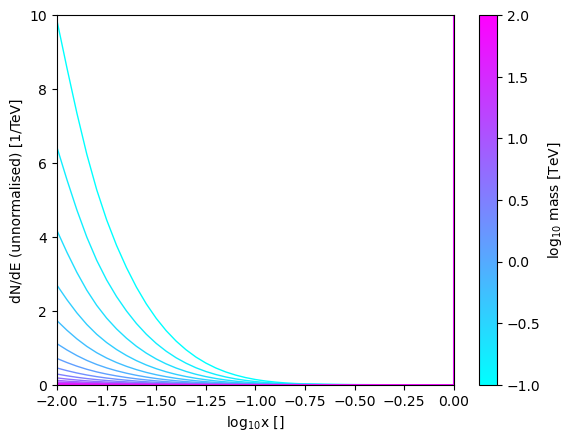

In [19]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])

    plt.plot(log10xvals, getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass)), color=color, lw=1.0)
plt.axvline(0.0, color=color)
plt.xlabel(r'log$_{10}$x []')
plt.ylabel('dN/dE (unnormalised) [1/TeV]')
plt.xlim([-2,0])
plt.ylim([0,10])
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

/Users/lpin0002/Desktop/DMPipe/BFCalc/createspectragrids.py:103: RuntimeWarning: invalid value encountered in log10
  return twodinterpolationfunc(np.log10(mDM), np.log10(energy/mDM))
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/2062852981.py:4: RuntimeWarning: divide by zero encountered in log
  normvals = np.log(getspectrafunc(10**logmass, 'b')(log10eaxis))
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/2062852981.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/2062852981.py:7: RuntimeWarning: invalid value encountered in log
  plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)


-1.9381544280647596
-1.2434002261370418
-0.7142807727283321
-0.29714435678630446
0.04807230427255413
0.3576366234245918
0.606367105802954
0.8353866178147609
1.0570990126862392
1.271433436433149
1.4739358221703296
1.6754135806069796
1.874539622747708
2.062931340027429
2.2464888606161413
2.3733571125636863


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/2062852981.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


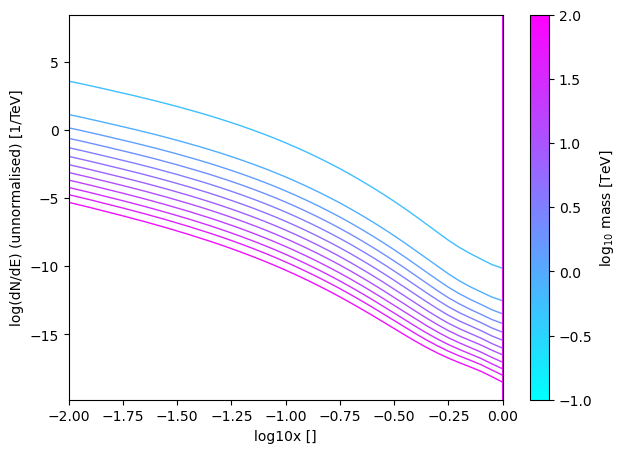

In [20]:
plt.figure(figsize=(7,5))
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    normvals = np.log(getspectrafunc(10**logmass, 'b')(log10eaxis))
    norm = special.logsumexp(normvals[~np.isnan(normvals)])
    print(norm)
    plt.plot(log10xvals, np.log(getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/norm), color=color, lw=1.0)
plt.axvline(0.0, color=color)
plt.xlabel('log10x []')
plt.ylabel('log(dN/dE) (unnormalised) [1/TeV]')
plt.xlim([-2,0])
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()

0.04172152771504539
0.15999228633391005
0.46222890021560026
1.0517504957063157
1.9888970506942718
3.267651957673086
4.8670379759136235
6.778619450582921
8.915472845974909
11.258116156938542
13.842823965855816
16.935988641794758
20.681676149534674
25.004721513255106
30.109981736096028
34.19395166972851


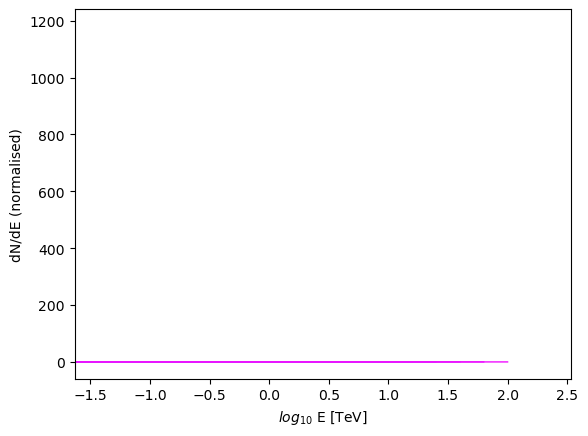

In [21]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = np.nansum(getspectrafunc(10**logmass, 'b')(10**log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10xvals+logmass, getspectrafunc(10**logmass, 'b')(10**(log10xvals+logmass))/dN_dE_norm, color=color, lw=1.0)
plt.xlim([min(log10eaxis), max(log10eaxis)])
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'dN/dE (normalised)')

plt.show()

6.426320496673188
6.3704364082543705
6.328046267195129
6.292168493913201
6.2587238466360935
6.225334917475923
6.190547739930958
6.153380657212921
6.113074291198906
6.068953472811552
6.020348655244509
5.966548275955091
5.9067672302325995
5.840124112109246
5.765624019265298
5.682146158056099


/var/folders/xr/793vfd394l701z7tfh27tbj9q0x4gd/T/ipykernel_12591/3090158571.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))


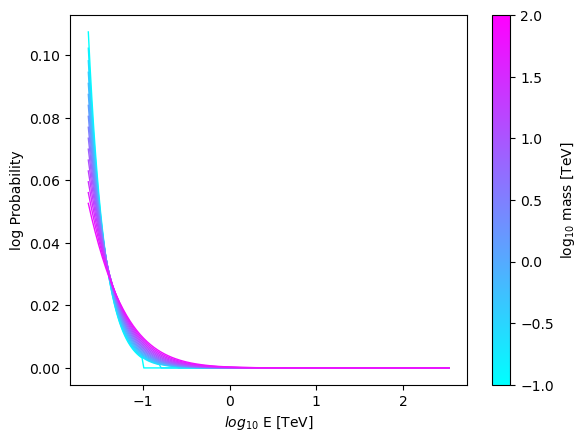

In [22]:
plt.figure()
for idx, logmass in enumerate(logmassaxis):
    color = colormap(idx/logmassaxis.shape[0])
    dN_dE_norm = special.logsumexp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis))
    print(dN_dE_norm)
    plt.plot(log10eaxis, np.exp(makedist(logmass, normeaxis=10**log10eaxis)(log10eaxis)-dN_dE_norm), color=color, lw=1.0)
plt.xlabel(r'$log_{10}$ E [TeV]')
plt.ylabel(r'log Probability')
norm = mpl.colors.Normalize(vmin=logmassaxis[0], vmax=logmassaxis[-1])

cb1 = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=colormap))
cb1.set_label(r'log$_{10}$ mass [TeV]')
plt.show()